# Practical 4
### Cross validation

This practical examines applying cross validation. It is straight forward to apply using sklearn, however be sure you understand also what cross validation means: review the text book, lecture 5 and the manual for sklearn cross validation and model selection  (http://scikit-learn.org/stable/modules/cross_validation.html). Also do a search online (e.g. see https://blog.csdn.net/zjsghww/article/details/51603814).

Import libraries

In [1]:
# Pandas 
import pandas as pd
import numpy as np

# matplotlib
import matplotlib.pylab as plt
%matplotlib inline

# Decision trees and logistic regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Train, test, and evaluation functions
from sklearn.metrics import accuracy_score
from sklearn.model_selection  import cross_val_score

### Data
We're going to use a dataset from Kaggle that contains information on some passengers from the sinking of the Titanic. This data set has 10 columns.

![title](images/titanic.jpg)

The columns (features) are:

```
Col.  Name        Description
----- ----------- ----------------------------------------------------------------
1     Survived    Survival (0 = No; 1 = Yes)
2     Pclass      Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
3     Sex         Sex (0 = Female, 1 = Male)
4     Age         Age
5     SibSp       Number of Siblings/Spouses Aboard
6     Parch       Number of Parents/Children Aboard
7     Fare        Passenger Fare
8     Embarked_S  Embarked from Southampton
9     Embarked_C  Embarked from Cherbourg
10    Embarked_Q  Embarked from Queenstown
```

Our goal is to build a model to predict if people survived the sinking (the first column, called `"Survived"`.

### Grid Searching for a Decision Tree
Below is some simple code to use 10-fold cross validation to get the performance for different decision trees with varying levels of complexity.

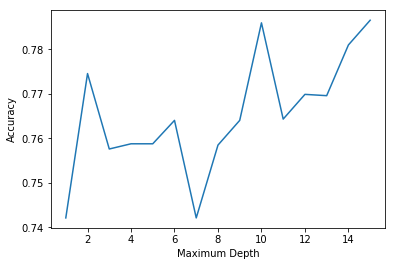

In [9]:
# Read data using pandas
data = pd.read_csv("data/titanic.csv")

# Split into X and Y
X = data.drop(['Survived'], 1)
Y = data['Survived']

# I will try maximum depths from 1 to 16
complexity_values = range(1,16)

# I need an empty list to hold my accuracies
accuracies = []

# Go through each complexity_value one at a time.
for complexity_value in complexity_values:
    # This will create an empty tree with a specific maximum depth (complexity)
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=complexity_value)
    
    # This will get us 10-fold cross validation accuracy with our tree and our data
    # We can do this in one line!
    cross_fold_accuracies = cross_val_score(tree, X, Y, scoring="accuracy", cv=10)
    
    # Average accuracy for all tests
    average_cross_fold_accuracy = np.mean(cross_fold_accuracies)
    
    # Append this accuracy to a list of accuracies
    accuracies.append(average_cross_fold_accuracy)

# Plot results for different complexity levels
plt.plot(complexity_values, accuracies)
plt.xlabel("Maximum Depth")
plt.ylabel("Accuracy")
plt.show()

### Team work
Get together with your teams and modify this code block to try different logistic regressions. 

Remember, here complexity if called $C$. $C$ is used like `max_depth` for instance is used to control complexity in a decision tree.

This value is similar to the $\lambda$ value discussed in class --- see slide 41 in lecture 5, and p 137 in the text  --- however note that here smaller values of $C$ correspond to a stronger regularization penalty, i.e. $C = \frac{1}{\lambda}$). 

Normal ranges for $C$ are powers of 10. For example: ..., 0.01, 0.1, 1, 1.0, 10.0, ... 

**Try different values of $C$ to try to find the best model.**

**What are your thoughts in comparing decision trees and logistic regression?**

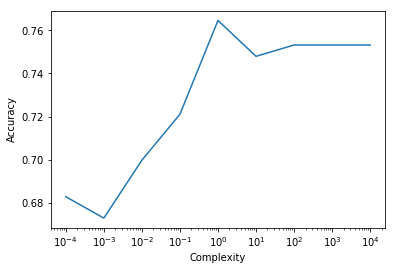

In [12]:
# Read data using pandas
data = pd.read_csv("data/titanic.csv")

# Split into X and Y
X = data.drop(['Survived'], 1)
Y = data['Survived']

# Try different regularizations (powers of 10)
complexity_values = [0.0001,0.001,0.01,0.1,1,10.0,100,1000,10000]

# We need an empty list to hold the accuracies
accuracies = []

# I will go through each complexity_value one at a time.
for complexity_value in complexity_values:
    # This will create an empty logistic regression with a particular regularization (C)
    logistic = LogisticRegression(C=complexity_value)
    
    # This will get us 10-fold cross validation accuracy with our logistic reg. and our data
    # We can do this in one line!
    cross_fold_accuracies = cross_val_score(logistic,X,Y,scoring="accuracy",cv=10)
    
    # Average accuracy
    average_cross_fold_accuracy = np.mean(cross_fold_accuracies)
    
    # Append this accuracy to a list of accuracies
    accuracies.append(average_cross_fold_accuracy)

# We want to plot our results
# This plots in a log way
plt.semilogx(complexity_values, accuracies)
plt.xlabel("Complexity")
plt.ylabel("Accuracy")
plt.show()

**Thoughts**

They both have a sweet point, where the complexity is neither too big nor too small, while the accuracy is still at a relatively good level.

In real world data mining tasks, we should also try to use this property and find the complexity that works best by tuning our parameters.